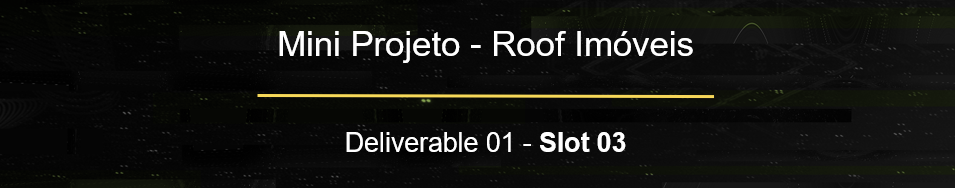

# Grupo d4g01

# Enunciado do Problema
Quais as 5 melhores oportunidades

Quais os 5 imóveis que representam maior risco

# Importando pacotes

In [243]:
#Bibliotecas para métodos numéricos
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime

#Biblioteca de Geolocalização
from geopy.geocoders import Nominatim

#Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 0.0 Importando dados

In [244]:
df_raw = pd.read_csv("kc_house_data.csv")
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)
df_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 0.1 Esquema dos dados

In [245]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## 0.2 Tratamento dos valores de data

In [246]:
#Apenas ano mes e dia
df_raw['date'] = df_raw['date'].apply(lambda x:x[:8])

#Conversão para data
df_raw['date'] = pd.to_datetime( df_raw['date'], format='%Y%m%d')
df_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 0.3 Estatísticas descritivas

In [247]:
df_raw.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 0.4 Visualização dos outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x15c4bec5910>,
 'caps': [<matplotlib.lines.Line2D at 0x15c4bf11070>,
 'boxes': [<matplotlib.lines.Line2D at 0x15c4bec5580>],
 'medians': [<matplotlib.lines.Line2D at 0x15c4bf11790>],
 'fliers': [<matplotlib.lines.Line2D at 0x15c4bf11b20>],
 'means': []}

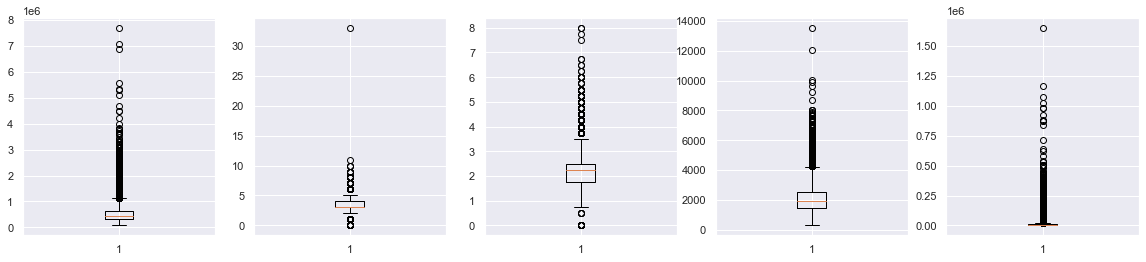

In [248]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(20,4))


ax1.boxplot(df_raw['price'])

ax2.boxplot(df_raw['bedrooms'])

ax3.boxplot(df_raw['bathrooms'])

ax4.boxplot(df_raw['sqft_living'])

ax5.boxplot(df_raw['sqft_lot'])

## 0.5 Limpeza dos dados

Foram computados os valores do z-score de todas as entradas, utilizando a média e o desvio padrão de cada coluna. As linhas que tinha qualquer coluna com valores acima de 3 desvios padrões da média, foram excluídas.

In [249]:
df_raw = df_raw[(np.abs(stats.zscore(df_raw['price'])) < 3)]
df_raw = df_raw[(np.abs(stats.zscore(df_raw['bedrooms'])) < 3)]
df_raw = df_raw[(np.abs(stats.zscore(df_raw['bathrooms'])) < 3)]
df_raw = df_raw[(np.abs(stats.zscore(df_raw['sqft_living'])) < 3)]
df_raw = df_raw[(np.abs(stats.zscore(df_raw['sqft_lot'])) < 3)]
df_raw = df_raw[(np.abs(stats.zscore(df_raw['floors'])) < 3)]
df_raw = df_raw[(np.abs(stats.zscore(df_raw['sqft_above'])) < 3)]
df_raw = df_raw[(np.abs(stats.zscore(df_raw['sqft_basement'])) < 3)]
df_raw = df_raw[(np.abs(stats.zscore(df_raw['sqft_living15'])) < 3)]
df_raw = df_raw[(np.abs(stats.zscore(df_raw['sqft_lot15'])) < 3)]


# 1.0 Cálculos iniciais

In [250]:
def divide(x,y):
    return x/y

### Preço por Metro de Moradia Construído

In [251]:
df_raw['Price per sqft living'] = df_raw.apply(lambda x: divide(x['price'],x['sqft_living']), axis=1)
df_raw.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price per sqft living
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521


### Preço por Metro de Terreno

In [252]:
df_raw['Price per sqft lot'] = df_raw.apply(lambda x: divide(x['price'],x['sqft_lot']), axis=1)
df_raw.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price per sqft living,Price per sqft lot
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847,39.274336
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521,74.288870


# 2.0 Visualização dos dados
Análise exploratória

In [253]:
#Definindo data frame para trabalho
df_work = df_raw.copy()

In [254]:
#Definindo função para visualização da distribuição dos imóveis
def scatter_graph_geo(
    df, 
    c_metric = 'price', c_min = 100000, c_max = 1000000,
    label= "Média metros construídos", label_metric ='sqft_living15', 
    scale_reducer=1
    ):
    return df.plot(
        kind='scatter',
        x = 'long', y ='lat', 
        alpha=0.4, s=df[label_metric]/scale_reducer, 
        label=label, figsize=(10,7),
        c=c_metric, cmap = plt.get_cmap('jet'), 
        colorbar=True, vmin=c_min, vmax=c_max
        )

## 2.1 Distribuição de Preço e Preço por metro de moradia construído no condado

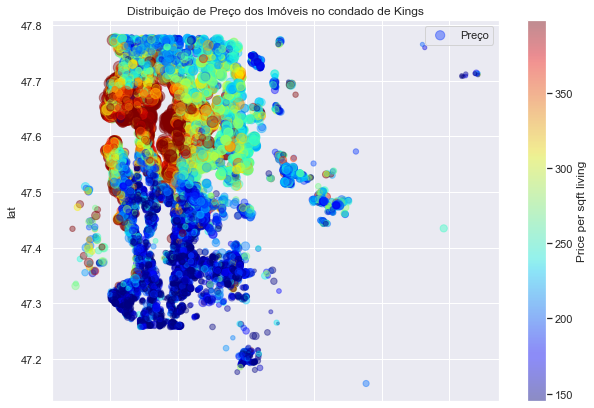

In [255]:
max_value = df_work['Price per sqft living'].quantile(0.90)
min_value = df_work['Price per sqft living'].quantile(0.10)

vis = scatter_graph_geo(
    df_work,
    c_metric = "Price per sqft living", c_min = min_value, c_max=max_value, 
    label = "Preço", label_metric = "price",
    scale_reducer = 10000
    )

vis.legend()
plt.title('Distribuição de Preço dos Imóveis no condado de Kings')
plt.show()

##### Vemos que os imóveis mais valorizados se encontram ao norte do condado

Concentrados na faixa de latitude que compreende os valores de 47,5 até 47,7

## 2.2 Distribuição de Preço para imóveis com valor de Preço por metro de moradia construído maior ou igual a $ 300

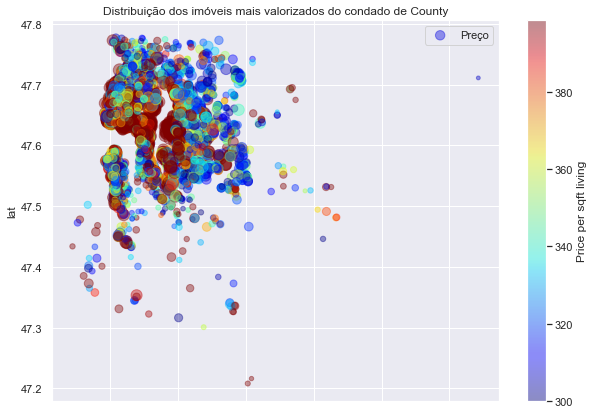

In [256]:
max_value = df_work['Price per sqft living'].quantile(0.90)
min_value = 300

df_hotspot = df_work[ df_work['Price per sqft living'] >= min_value]

vis = scatter_graph_geo(
    df_hotspot,
    c_metric = "Price per sqft living", c_min = min_value, c_max=max_value, 
    label = "Preço", label_metric = "price",
    scale_reducer = 10000
    )

vis.legend()
plt.title('Distribuição dos imóveis mais valorizados do condado de County')
plt.show()

## 2.3 Correlação entre atributos
Quais variáveis mais impactam no preço dos imóveis?

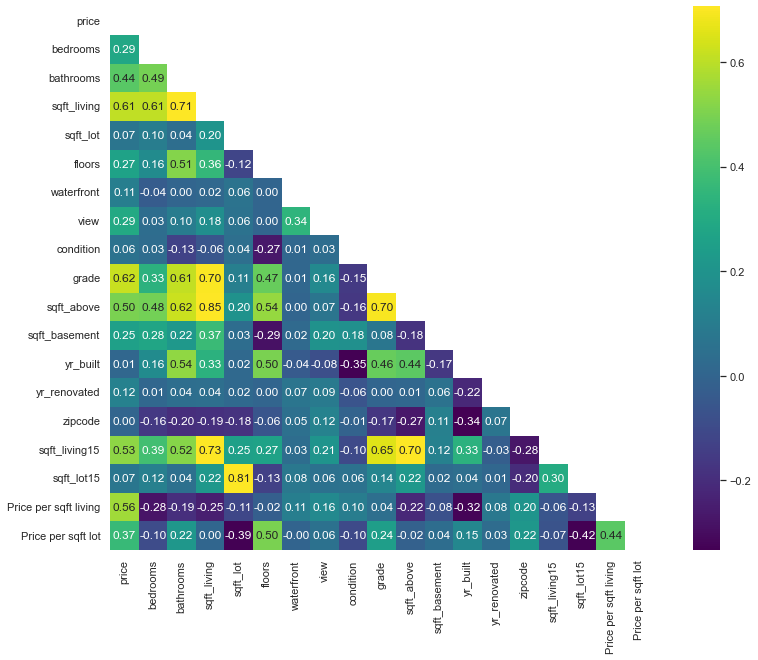

In [257]:
# Mapa de calor utilizando a matriz correlacional das grandezas
heat_map = df_work.drop(labels=['id', 'date', 'lat', 'long'], axis=1) #retirei as grandezas de localizaçao

heat_map_corr = heat_map.corr()
mask = np.zeros_like(heat_map_corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(14,10))
    ax = sns.heatmap(heat_map_corr,mask=mask, square=True, annot=True, fmt='.2f', cmap='viridis', 
                     robust=True)

##### Conclusões

**Preço por metro de moradia construído**

Afetado positivamente por:
*   View (vista)
*   Waterfront (frente para o mar)
*   zipcode (localização)

Afetado negativamente por:
*   yr_built (ano de construção)

**Preço**

Afetado positivamente por:
*   Grade (qualidade dos materiais)
*   sqft_above (área acima do nível do solo)
*   Bathrooms (número de banheiros)
*   Bedrooms (número de quartos
*   sqft_living (metragem construída)

Afetado negativamente por:
*   Ano de construção
*   Número de quartos

# 3.0 Aprofundamento: Entendendo as variáveis

## Preço

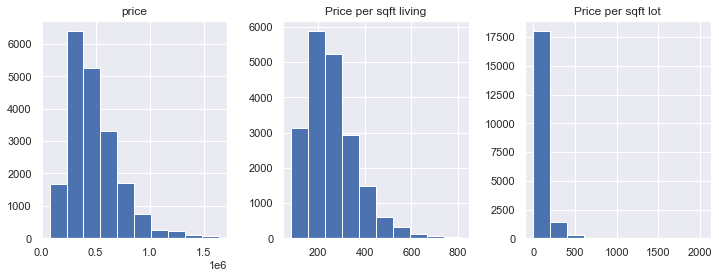

In [258]:
df_work.hist(
    column= ['price', 'Price per sqft living',"Price per sqft lot"],
    layout=(1,3), 
    figsize=(12,4)
);

In [259]:
print(f'Média de Preço: {df_work["price"].mean()};')
print(f'Média de Preço por ft² construído: {df_work["Price per sqft living"].mean()};')
print(f'Média de Preço por ft² de terreno: {df_work["Price per sqft lot"].mean()};')

Média de Preço: 486016.9009610521;
Média de Preço por ft² construído: 260.82164720432354;
Média de Preço por ft² de terreno: 89.98431190480544;


In [260]:
df_work["Price per sqft living"].describe()

count    19770.000000
mean       260.821647
std        105.490541
min         87.588235
25%        180.722892
50%        243.750000
75%        316.216216
max        810.138889
Name: Price per sqft living, dtype: float64

## Tamanho dos Imóveis

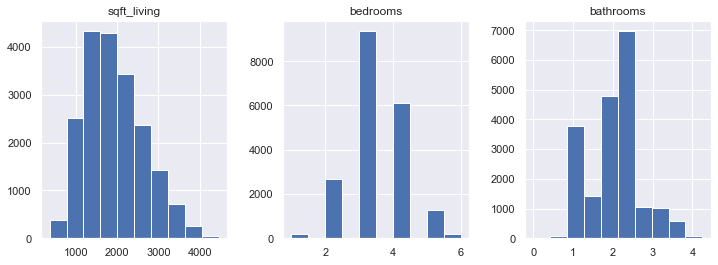

In [261]:
df_work.hist(
    column= ['sqft_living','bedrooms', 'bathrooms'],
    layout=(1,3), 
    figsize=(12,4)
);

In [262]:
print(f'Média de ft² construídos: {df_work["sqft_living"].mean()};')
print(f'Média de quartos: {df_work["bedrooms"].mean()};')
print(f'Média de banheiros: {df_work["bathrooms"].mean()};')

Média de ft² construídos: 1934.5712190187153;
Média de quartos: 3.3099645928174;
Média de banheiros: 2.031297420333839;


## Status: data dos imóveis e estado de conservação

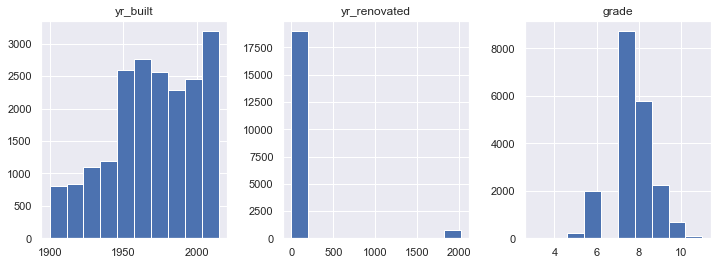

In [263]:
df_work.hist(
    column= ['yr_built', 'yr_renovated',"grade"],
    layout=(1,3), 
    figsize=(12,4)
);

##### Clonclusões

São imóveis grandes. E o Preço por ft² construído se concentra entre 200 e 300 $/ft².

A maioria dos imóveis são relativamente novos. Não passaram por reforma e foram construídos com materiais de qualidade.

# 4.0 Imóveis que valorizaram

Quais imóveis foram vendidos mais de uma vez no período?

In [264]:
summarize = df_work.groupby("id").agg({'date': pd.Series.nunique, 'price': np.diff, 'Price per sqft living': np.diff, 'yr_renovated': np.diff,})
summarize = summarize[summarize['date']>1]
summarize.reset_index(level=0, inplace=True)
summarize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     167 non-null    int64 
 1   date                   167 non-null    int64 
 2   price                  167 non-null    object
 3   Price per sqft living  167 non-null    object
 4   yr_renovated           167 non-null    object
dtypes: int64(2), object(3)
memory usage: 6.6+ KB


In [265]:
summarize.head(15)

,id,date,price,Price per sqft living,yr_renovated
0,1000102,2,20000.0,8.333333,0
1,7200179,2,25000.0,29.761905,0
2,109200390,2,5000.0,3.378378,0
3,123039336,2,96900.0,156.290323,0
4,251300110,2,133000.0,52.988048,0
5,302000375,2,80900.0,77.047619,0
6,324000530,2,257500.0,195.075758,0
7,526059224,2,210000.0,127.272727,0
8,641900050,2,164950.0,76.365741,0
9,643300040,2,238521.0,124.229687,0


Para os Imóveis que foram vendidos mais de duas vezes, queremos saber a variação final, dada pela soma das variações.

In [266]:
def total_diff(x):
    value = np.float64(x)
    return np.sum(value)

In [267]:
summarize['price'] = summarize['price'].apply(total_diff)
summarize['yr_renovated'] = summarize['yr_renovated'].apply(total_diff)
summarize['Price per sqft living'] = summarize['Price per sqft living'].apply(total_diff)
summarize.head()

,id,date,price,Price per sqft living,yr_renovated
0,1000102,2,20000.0,8.333333,0.0
1,7200179,2,25000.0,29.761905,0.0
2,109200390,2,5000.0,3.378378,0.0
3,123039336,2,96900.0,156.290323,0.0
4,251300110,2,133000.0,52.988048,0.0


In [268]:
summarize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     167 non-null    int64  
 1   date                   167 non-null    int64  
 2   price                  167 non-null    float64
 3   Price per sqft living  167 non-null    float64
 4   yr_renovated           167 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 6.6 KB


Checando agrupamento: Os valores de ID são únicos?

In [269]:
ids_on_summarize = summarize.id.count()
unique_ids = pd.Series(pd.unique(summarize.id))

ids_on_summarize == unique_ids.count()

True

Imóveis com maior valorização

In [270]:
upper_limit = summarize['Price per sqft living'].quantile(0.75)
summarize = summarize[ summarize['Price per sqft living'] > upper_limit ]
summarize.drop(labels = 'date', axis=1, inplace=True, )

Obtendo atributos referentes aos IDs

In [271]:
df_right = df_work[['id','bathrooms','bedrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'lat', 'long','sqft_living15']]

In [272]:
df_merged = pd.merge( left=summarize , right=df_right, on = 'id', how='left')
df_merged.drop_duplicates(subset='id', keep='first', inplace=True)
df_merged.head()

,id,price,Price per sqft living,yr_renovated,bathrooms,bedrooms,sqft_living,sqft_lot,yr_built,lat,long,sqft_living15
0,123039336,96900.0,156.290323,0.0,1.00,1,620,8261,1939,47.5138,-122.364,1180
2,324000530,257500.0,195.075758,0.0,1.00,3,1320,5000,1912,47.5711,-122.386,1320
4,1219000473,206050.0,131.242038,0.0,1.75,3,1570,15330,1956,47.4608,-122.340,1250
6,1231000510,247000.0,165.771812,0.0,1.75,3,1490,3800,1913,47.5554,-122.270,2180
8,1232000810,197000.0,140.714286,0.0,2.50,3,1400,4800,1921,47.6865,-122.379,1440


## 4.1 Quais caracteristicas estes imóveis possuem?

In [273]:
df_merged.describe()

,id,price,Price per sqft living,yr_renovated,bathrooms,bedrooms,sqft_living,sqft_lot,yr_built,lat,long,sqft_living15
count,4.200000e+01,42.000000,42.000000,42.0,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,4.874062e+09,250945.333333,195.147093,0.0,1.452381,3.000000,1344.761905,7316.642857,1941.714286,47.578490,-122.309762,1569.761905
std,2.721705e+09,89748.396789,76.882356,0.0,0.497672,1.168697,421.653181,3237.299114,21.919237,0.104711,0.075888,325.677441
min,1.230393e+08,96900.000000,128.658537,0.0,1.000000,1.000000,580.000000,3800.000000,1900.000000,47.327700,-122.410000,840.000000
25%,2.744050e+09,187793.750000,143.361060,0.0,1.000000,2.000000,937.500000,5000.000000,1926.000000,47.515150,-122.358500,1367.500000
50%,4.404250e+09,251000.000000,171.581652,0.0,1.500000,3.000000,1445.000000,6942.500000,1942.500000,47.564600,-122.328500,1520.000000
75%,7.205126e+09,314567.750000,216.171329,0.0,1.750000,3.000000,1580.000000,8255.750000,1954.750000,47.684175,-122.285750,1810.000000
max,9.834200e+09,529950.000000,490.694444,0.0,2.500000,6.000000,2230.000000,17652.000000,1985.000000,47.737200,-122.046000,2330.000000


### Resposta para 4.1:

*   Banheiros 2
*   Quartos 3
*   Área construída de até 2 mil
*   Terrenos de até 10 mil ft²
*   Ano de construção inferior a 1990
*   Ainda não reformadas

São imóveis construídos antes de 1990, próximos de áreas valorizadas

## 4.2 Localização dos Imóveis

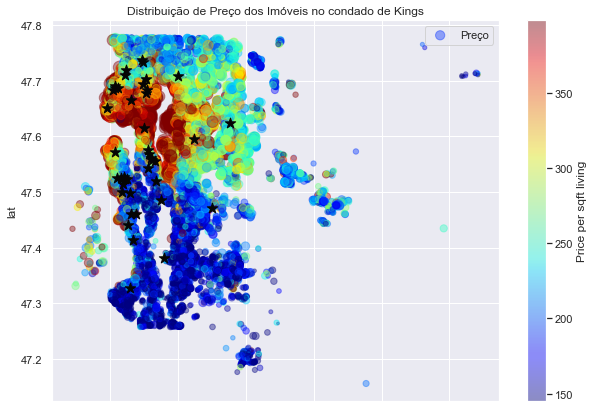

In [274]:
max_value = df_work['Price per sqft living'].quantile(0.90)
min_value = df_work['Price per sqft living'].quantile(0.10)

axs1 = scatter_graph_geo(
    df_work,
    c_metric = "Price per sqft living", c_min = min_value, c_max=max_value, 
    label = "Preço", label_metric = "price",
    scale_reducer = 10000
    )
axs2 = df_merged.plot(kind='scatter', x='long', y='lat', color='#050505', s=120, ax=axs1, marker='*')


axs1.legend()
plt.title('Distribuição de Preço dos Imóveis no condado de Kings')
plt.show()

## 4.3 Cidades dos Imóveis que mais valorizaram

In [275]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [276]:
def get_cities(lat, long):
    location = geolocator.reverse(str(lat)+","+str(long))
    address = location.raw['address']
    return address.get('city', '')

In [277]:
df_merged['City'] = df_merged.apply(lambda x: get_cities(x['lat'], x['long']), axis=1)
df_merged.loc[df_merged['City'] == '', 'City'] = 'Des Moines'
df_merged.head()

,id,price,Price per sqft living,yr_renovated,bathrooms,bedrooms,sqft_living,sqft_lot,yr_built,lat,long,sqft_living15,City
0,123039336,96900.0,156.290323,0.0,1.00,1,620,8261,1939,47.5138,-122.364,1180,Des Moines
2,324000530,257500.0,195.075758,0.0,1.00,3,1320,5000,1912,47.5711,-122.386,1320,Seattle
4,1219000473,206050.0,131.242038,0.0,1.75,3,1570,15330,1956,47.4608,-122.340,1250,Burien
6,1231000510,247000.0,165.771812,0.0,1.75,3,1490,3800,1913,47.5554,-122.270,2180,Seattle
8,1232000810,197000.0,140.714286,0.0,2.50,3,1400,4800,1921,47.6865,-122.379,1440,Seattle


# 5.0 Melhores imóveis para se investir

Características desejáveis

In [278]:
max_quartos = df_merged['bedrooms'].quantile(0.75)
min_quartos = df_merged['bedrooms'].quantile(0.25)

max_banheiros = df_merged['bathrooms'].quantile(0.75)
min_banheiros = df_merged['bathrooms'].quantile(0.25)

max_area_construida = df_merged['sqft_living'].quantile(0.75)
min_area_construida = df_merged['sqft_living'].quantile(0.25)

max_area_terreno = df_merged['sqft_lot'].quantile(0.75)
min_area_terreno = df_merged['sqft_lot'].quantile(0.25)

max_ano_construcao = df_merged['yr_built'].max()
min_ano_construcao = df_merged['yr_built'].quantile(0.75)

max_lat=47.71
min_lat= 47.5
min_long = -123.0
max_long = -122.0

In [279]:
max_ano_construcao

1985

In [280]:
df_imoveis_indicados = df_work.loc[(
                                   ((df_work['bathrooms']>=min_banheiros) & (df_work['bathrooms']<=max_banheiros))&
                                   ((df_work['bedrooms']>=min_quartos) & (df_work['bedrooms']>=min_quartos))&
                                   ((df_work['sqft_living']>=min_area_construida) & (df_work['sqft_living']<=max_area_construida)) &
                                   ((df_work['sqft_lot']>=min_area_terreno) & (df_work['sqft_lot']<=max_area_terreno)) &
                                   ((df_work['yr_built']>=min_ano_construcao) & (df_work['yr_built']<=max_ano_construcao)) &
                                   ((df_work['lat']>=min_lat) & (df_work['lat']<=max_lat)) & 
                                    ((df_work['long']>=min_long) & (df_work['long']<=max_long))
)]
df_imoveis_indicados.id.count()

208

## Indicação

Imóveis grandes na faixa de preço de \$ 315 mil, com boa quantidade de quartos, um número razoável de banheiros por quartos, construídos por volta de 1975 que se localizam próximos de áreas nóbres.

Veja abaixo:

In [281]:
df_imoveis_indicados= df_imoveis_indicados.loc[
                                            (df_imoveis_indicados['price']>= df_imoveis_indicados['price'].quantile(0.25))&
                                            (df_imoveis_indicados['price']<= df_imoveis_indicados['price'].quantile(0.75))
]
df_imoveis_indicados.id.count()

104

In [282]:
df_imoveis_indicados.sort_values(by=['price'], inplace=True, ascending=True)
df_imoveis_indicados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price per sqft living,Price per sqft lot
1927,2113700335,2015-04-08,316500.0,3,1.75,1460,6360,1.0,0,2,3,7,1010,450,1979,0,98106,47.5311,-122.353,1400,4240,216.780822,49.764151
12056,1282300105,2014-06-04,317000.0,3,1.00,1010,5400,1.0,0,0,3,6,1010,0,1959,0,98144,47.5746,-122.293,960,5400,313.861386,58.703704
17303,9284801100,2015-01-05,317000.0,3,1.50,1060,5750,1.0,0,0,2,7,1060,0,1981,0,98126,47.5532,-122.372,1060,5750,299.056604,55.130435
9106,3438500790,2014-09-20,318500.0,5,1.75,1550,6986,1.0,0,0,3,7,1030,520,1978,0,98106,47.5503,-122.356,1550,6986,205.483871,45.591182
7480,2113700780,2015-01-13,320000.0,3,1.00,1060,5000,1.0,0,0,3,7,1060,0,1958,0,98106,47.5294,-122.354,1220,4600,301.886792,64.000000


In [283]:
df_imoveis_indicados=df_imoveis_indicados.head()

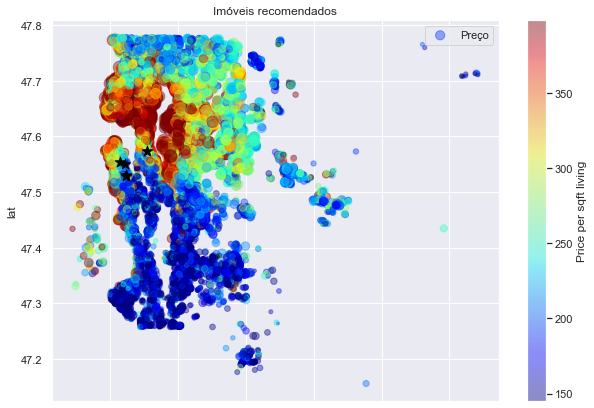

In [284]:
max_value = df_work['Price per sqft living'].quantile(0.90)
min_value = df_work['Price per sqft living'].quantile(0.10)

axs1 = scatter_graph_geo(
    df_work,
    c_metric = "Price per sqft living", c_min = min_value, c_max=max_value, 
    label = "Preço", label_metric = "price",
    scale_reducer = 10000
    )
axs2 = df_imoveis_indicados.plot(kind='scatter', x='long', y='lat', color='#050505', s=120, ax=axs1, marker='*')


axs1.legend()
plt.title('Imóveis recomendados')
plt.show()

## 6.0 - Imóveis que se desvalorizaram

Criando um dataframe com imoveis que foram vendidos mais de uma vez no período

In [285]:

summarize2 = df_work.groupby("id").agg({'date': pd.Series.nunique, 'price': np.diff, 'Price per sqft living': np.diff, 'yr_renovated': np.diff,})
summarize2 = summarize2[summarize2['date']>1]
summarize2.reset_index(level=0, inplace=True)
summarize2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     167 non-null    int64 
 1   date                   167 non-null    int64 
 2   price                  167 non-null    object
 3   Price per sqft living  167 non-null    object
 4   yr_renovated           167 non-null    object
dtypes: int64(2), object(3)
memory usage: 6.6+ KB


Para os Imóveis que foram vendidos mais de duas vezes, queremos saber a variação final, dada pela soma das variações.

In [286]:

summarize2['price'] = summarize2['price'].apply(total_diff)
summarize2['yr_renovated'] = summarize2['yr_renovated'].apply(total_diff)
summarize2['Price per sqft living'] = summarize2['Price per sqft living'].apply(total_diff)
summarize2.head()

,id,date,price,Price per sqft living,yr_renovated
0,1000102,2,20000.0,8.333333,0.0
1,7200179,2,25000.0,29.761905,0.0
2,109200390,2,5000.0,3.378378,0.0
3,123039336,2,96900.0,156.290323,0.0
4,251300110,2,133000.0,52.988048,0.0


Queremos encontrar imóveis os quais desvalorizaram de preço  em sua segunda venda

In [287]:
summarize2[summarize2['price'] <0]

,id,date,price,Price per sqft living,yr_renovated
57,2619920170,2,-7500.0,-2.321981,0.0
60,2726049071,2,-20050.0,-24.451220,0.0
62,2767603612,2,-11000.0,-8.527132,0.0
151,8682262400,2,-10050.0,-7.444444,0.0


In [288]:
desvalorizados = summarize2[summarize2['price'] < 0 ].sort_values(by='price', ascending=True)
desvalorizados

,id,date,price,Price per sqft living,yr_renovated
60,2726049071,2,-20050.0,-24.451220,0.0
62,2767603612,2,-11000.0,-8.527132,0.0
151,8682262400,2,-10050.0,-7.444444,0.0
57,2619920170,2,-7500.0,-2.321981,0.0


In [289]:
desvalorizados.drop(labels = 'date', axis=1, inplace=True, )

Obtendo os atributos referentes aos ids.

In [290]:
indexes = np.array(desvalorizados['id'])
loc = df_work.id.isin(indexes)
desvalorizados_carac = df_work[loc].drop_duplicates(subset=['id'], keep='last')
desvalorizados_carac

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price per sqft living,Price per sqft lot
837,8682262400,2015-05-13,419950.0,2,1.75,1350,4003,1.0,0,0,3,8,1350,0,2004,0,98053,47.7176,-122.033,1350,4479,311.074074,104.908818
5593,2726049071,2015-04-08,489950.0,2,1.00,820,4206,1.0,0,0,3,5,820,0,1949,0,98125,47.7076,-122.284,1810,7200,597.500000,116.488350
10611,2767603612,2015-01-13,489000.0,2,2.25,1290,1334,3.0,0,0,3,8,1290,0,2007,0,98107,47.6719,-122.382,1350,1334,379.069767,366.566717
15278,2619920170,2014-12-19,765000.0,4,2.50,3230,4290,2.0,0,0,3,9,3230,0,2004,0,98033,47.6874,-122.161,3220,5083,236.842105,178.321678


## 6.1 Quais caracteristicas estes imóveis possuem?

In [291]:
desvalorizados_carac.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price per sqft living,Price per sqft lot
count,4.000000e+00,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.0,4.0,4.0,4.000000,4.000000,4.0,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,4.198959e+09,540975.000000,2.5,1.875000,1672.500000,3458.250000,1.750000,0.0,0.0,3.0,7.500000,1672.500000,0.0,1991.000000,0.0,98079.500000,47.696125,-122.215000,1932.500000,4524.000000,381.121487,191.571391
std,2.989516e+09,152904.330111,1.0,0.661438,1065.031298,1421.282138,0.957427,0.0,0.0,0.0,1.732051,1065.031298,0.0,28.035692,0.0,43.554563,0.020460,0.151316,885.301267,2425.667056,155.506753,121.032755
min,2.619920e+09,419950.000000,2.0,1.000000,820.000000,1334.000000,1.000000,0.0,0.0,3.0,5.000000,820.000000,0.0,1949.000000,0.0,98033.000000,47.671900,-122.382000,1350.000000,1334.000000,236.842105,104.908818
25%,2.699517e+09,471737.500000,2.0,1.562500,1172.500000,3335.750000,1.000000,0.0,0.0,3.0,7.250000,1172.500000,0.0,1990.250000,0.0,98048.000000,47.683525,-122.308500,1350.000000,3692.750000,292.516082,113.593467
50%,2.746826e+09,489475.000000,2.0,2.000000,1320.000000,4104.500000,1.500000,0.0,0.0,3.0,8.000000,1320.000000,0.0,2004.000000,0.0,98080.000000,47.697500,-122.222500,1580.000000,4781.000000,345.071921,147.405014
75%,4.246268e+09,558712.500000,2.5,2.312500,1820.000000,4227.000000,2.250000,0.0,0.0,3.0,8.250000,1820.000000,0.0,2004.750000,0.0,98111.500000,47.710100,-122.129000,2162.500000,5612.250000,433.677326,225.382938
max,8.682262e+09,765000.000000,4.0,2.500000,3230.000000,4290.000000,3.000000,0.0,0.0,3.0,9.000000,3230.000000,0.0,2007.000000,0.0,98125.000000,47.717600,-122.033000,3220.000000,7200.000000,597.500000,366.566717


### Resposta para 6.1:

*   Banheiros 2
*   Quartos 2
*   Área construída maior que 2 mil ft²
*   Terrenos de até 10 mil ft²
*   Ano de construção superior a 2000
*   Ainda não reformadas

São imóveis construídos apos 2000, próximos a regioes menos valorizadas.

## 6.2 Localização dos imóveis.

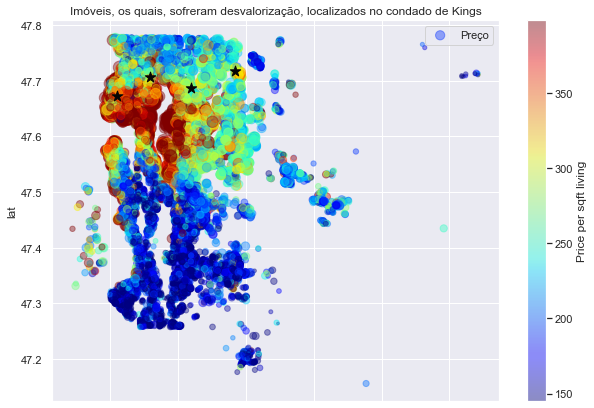

In [292]:
max_value = df_work['Price per sqft living'].quantile(0.90)
min_value = df_work['Price per sqft living'].quantile(0.10)

axs1 = scatter_graph_geo(
    df_work,
    c_metric = "Price per sqft living", c_min = min_value, c_max=max_value, 
    label = "Preço", label_metric = "price",
    scale_reducer = 10000
    )
axs2 = desvalorizados_carac.plot(kind='scatter', x='long', y='lat', color='#050505', s=120, ax=axs1, marker='*')


axs1.legend()
plt.title('Imóveis, os quais, sofreram desvalorização, localizados no condado de Kings')
plt.show()

## 6.3 Cidades dos Imóveis que mais desvalorizaram

In [293]:
desvalorizados_carac['City'] = desvalorizados_carac.apply(lambda x: get_cities(x['lat'], x['long']), axis=1)
desvalorizados_carac.loc[desvalorizados_carac['City'] == '', 'City'] = 'Des Moines'
desvalorizados_carac.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price per sqft living,Price per sqft lot,City
837,8682262400,2015-05-13,419950.0,2,1.75,1350,4003,1.0,0,0,3,8,1350,0,2004,0,98053,47.7176,-122.033,1350,4479,311.074074,104.908818,Des Moines
5593,2726049071,2015-04-08,489950.0,2,1.00,820,4206,1.0,0,0,3,5,820,0,1949,0,98125,47.7076,-122.284,1810,7200,597.500000,116.488350,Seattle
10611,2767603612,2015-01-13,489000.0,2,2.25,1290,1334,3.0,0,0,3,8,1290,0,2007,0,98107,47.6719,-122.382,1350,1334,379.069767,366.566717,Seattle
15278,2619920170,2014-12-19,765000.0,4,2.50,3230,4290,2.0,0,0,3,9,3230,0,2004,0,98033,47.6874,-122.161,3220,5083,236.842105,178.321678,Des Moines


## 7.0 Piores imóveis para se investir

Características indesejáveis

In [321]:
max_quartos = desvalorizados_carac['bedrooms'].quantile(0.75)
min_quartos = desvalorizados_carac['bedrooms'].quantile(0.25)

max_banheiros = desvalorizados_carac['bathrooms'].quantile(0.75)
min_banheiros = desvalorizados_carac['bathrooms'].quantile(0.25)

max_area_construida = desvalorizados_carac['sqft_living'].quantile(0.75)
min_area_construida = desvalorizados_carac['sqft_living'].quantile(0.25)

max_area_terreno = desvalorizados_carac['sqft_lot'].quantile(0.75)
min_area_terreno = desvalorizados_carac['sqft_lot'].quantile(0.25)

max_ano_construcao = desvalorizados_carac['yr_built'].max()
min_ano_construcao = desvalorizados_carac['yr_built'].quantile(0.75)

max_lat=47.71
min_lat= 47.5
min_long = -123.0
max_long = -122.0

In [322]:
max_ano_construcao

2007

In [323]:
df_imoveis_n_indicados = df_work.loc[(
                                   ((df_work['bathrooms']>=min_banheiros) & (df_work['bathrooms']<=max_banheiros))&
                                   ((df_work['bedrooms']>=min_quartos) & (df_work['bedrooms']>=min_quartos))&
                                   ((df_work['sqft_living']>=min_area_construida) & (df_work['sqft_living']<=max_area_construida)) &
                                   ((df_work['sqft_lot']>=min_area_terreno) & (df_work['sqft_lot']<=max_area_terreno)) &
                                   ((df_work['yr_built']>=min_ano_construcao) & (df_work['yr_built']<=max_ano_construcao)) &
                                   ((df_work['lat']>=min_lat) & (df_work['lat']<=max_lat)) & 
                                    ((df_work['long']>=min_long) & (df_work['long']<=max_long))
)]
df_imoveis_n_indicados.id.count()

2

In [324]:
df_imoveis_n_indicados

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price per sqft living,Price per sqft lot
5559,3630120380,2015-02-05,539950.0,2,2.00,1670,3507,1.0,0,0,3,9,1670,0,2007,0,98029,47.5545,-122.003,2330,3889,323.323353,153.963502
6528,3630120050,2014-06-25,565000.0,2,1.75,1670,4008,1.0,0,0,3,9,1670,0,2005,0,98029,47.5539,-122.001,2330,3752,338.323353,140.968064


Junção dos dataframes de imoveis que mais desvalorizaram com o dos imoveis nao indicados.

In [325]:
df_imoveis_n_indicados = pd.concat([desvalorizados_carac, df_imoveis_n_indicados], axis=0 )
df_imoveis_n_indicados

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price per sqft living,Price per sqft lot,City
837,8682262400,2015-05-13,419950.0,2,1.75,1350,4003,1.0,0,0,3,8,1350,0,2004,0,98053,47.7176,-122.033,1350,4479,311.074074,104.908818,Des Moines
5593,2726049071,2015-04-08,489950.0,2,1.00,820,4206,1.0,0,0,3,5,820,0,1949,0,98125,47.7076,-122.284,1810,7200,597.500000,116.488350,Seattle
10611,2767603612,2015-01-13,489000.0,2,2.25,1290,1334,3.0,0,0,3,8,1290,0,2007,0,98107,47.6719,-122.382,1350,1334,379.069767,366.566717,Seattle
15278,2619920170,2014-12-19,765000.0,4,2.50,3230,4290,2.0,0,0,3,9,3230,0,2004,0,98033,47.6874,-122.161,3220,5083,236.842105,178.321678,Des Moines
5559,3630120380,2015-02-05,539950.0,2,2.00,1670,3507,1.0,0,0,3,9,1670,0,2007,0,98029,47.5545,-122.003,2330,3889,323.323353,153.963502,NaN
6528,3630120050,2014-06-25,565000.0,2,1.75,1670,4008,1.0,0,0,3,9,1670,0,2005,0,98029,47.5539,-122.001,2330,3752,338.323353,140.968064,NaN


escolhendo apenas os 5 valores iniciais.

In [327]:
df_imoveis_n_indicados = df_imoveis_n_indicados.head()

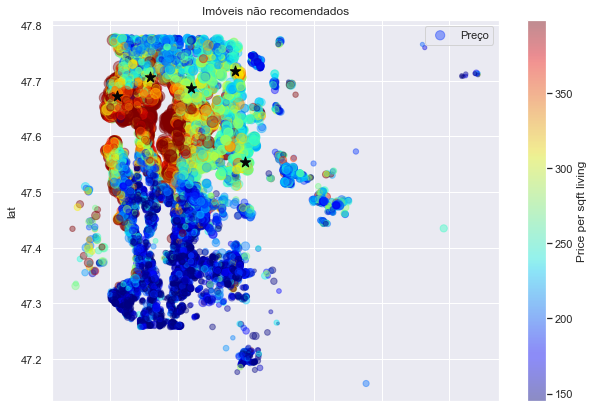

In [328]:
max_value = df_work['Price per sqft living'].quantile(0.90)
min_value = df_work['Price per sqft living'].quantile(0.10)

axs1 = scatter_graph_geo(
    df_work,
    c_metric = "Price per sqft living", c_min = min_value, c_max=max_value, 
    label = "Preço", label_metric = "price",
    scale_reducer = 10000
    )
axs2 = df_imoveis_n_indicados.plot(kind='scatter', x='long', y='lat', color='#050505', s=120, ax=axs1, marker='*')


axs1.legend()
plt.title('Imóveis não recomendados')
plt.show()

## Contraindicação

Os imóveis os quais nao indicamos são casas com preço acima de $ 400 mil com  2 quartos em média, contruídos após o ano 2000 próximo a areas menos valorizadas.